# Baseball Prediction and Pythagorean expectations




In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.special import gamma, factorial
from datetime import datetime
import statsmodels.api as sm
import statistics
import time
import pemod as pe


In [41]:
# parameters
n_sim      = 10         # number of simulations 
pe_exp     = 1.83        # exponent to compute PE
shape      = 1.83        # common shape parameter of the Weibull dist.
pe_method  = "basic"     # {basic, davenport, smyth}
tol_method = 2           # {1, 2}: 1(2) is without(with) intercept
sim_method = "basic"      # {"basic", "bayes", "opp", "both"}: bayesian updating for scale param; include opponent strength 
opp_param  = 0.25        # reduction in scale param. associated with a strong opponent
rs_0       = 4           # expected runs in week 1



In [27]:
# set tolerance parameters 
season_data = pe.data_read(2010)
tol_prm, bs = pe.params(season_data, pe_exp, shape, rs_0, method = tol_method)
eps1 = np.round(np.mean(tol_prm["eps_1"]), 4)
eps2 = np.round(np.mean(tol_prm["eps_2"]), 4)


In [ ]:
sim_method = "bayes"     # {"basic", "bayes", "opp", "both"}: bayesian updating for scale param; include opponent strength 
n_sim      = 400         # number of simulations 
b_score = pd.Series(index = range(2010, 2023))

start = time.time()

for year in range(2010, 2023):
    print("Year:  ", year)
    season_data = pe.data_read(year)
    
    # bayesian updating
    pr1, scale_bayes = pe.params(season_data, pe_exp, shape, rs_0)
       
    # simulate 
    sim_g, rej = pe.season_sim(season_data, scale_bayes, n_sim, eps1, eps2, shape, pe_method, sim_method, opp_param)
    
    # prediction
    pred = pd.Series(sim_g[sim_g["res(team_1)"]==1]["prob"].sum(), index = season_data.index)
    
    # Brier Score
    b_score[year] = pe.bscore(pred, season_data["team1_win"])
    

finish = time.time()

print("run time:", (finish-start)/60, "minutes." )

Year:   2010
Year:   2011
Year:   2012
Year:   2013


In [73]:
b_score

2010    0.261416
2011    0.249930
2012    0.272324
2013    0.254336
2014    0.250061
2015    0.250731
2016    0.252316
2017    0.250023
2018    0.253777
2019    0.251127
2020    0.265294
2021    0.267390
2022    0.252172
dtype: float64

In [75]:
b_score

2010    0.249845
2011    0.261775
2012    0.253583
2013    0.251021
2014    0.252589
2015    0.253121
2016    0.252217
2017    0.263120
2018    0.263062
2019    0.250162
2020    0.271692
2021    0.274271
2022    0.251531
dtype: float64

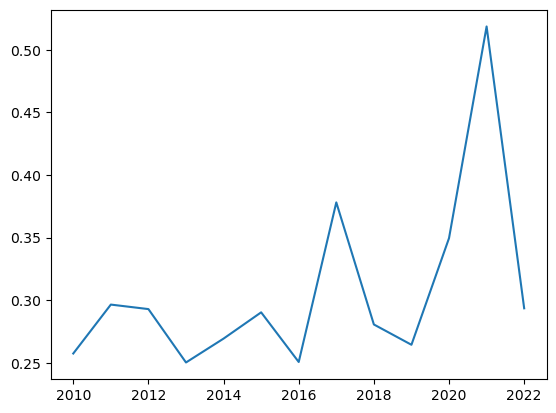

In [57]:
plt.plot(b_score)